# Импорт библиотек

In [1]:
from tensorflow import keras as k
import tensorflow as tf

from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

2023-05-14 12:48:36.219839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Загрузка и предобработка данных

In [2]:
(X_train, y_train), (X_test, y_test) = k.datasets.mnist.load_data()

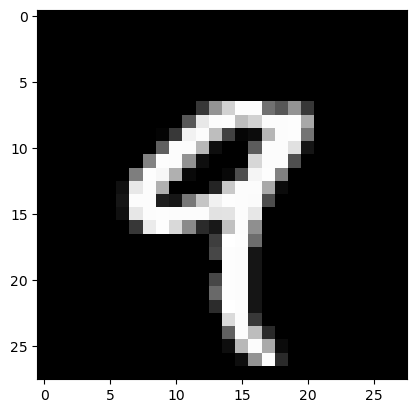

In [3]:
plt.imshow(X_train[4], cmap='gray')
plt.show()

In [5]:
X_train[-1].shape

(784,)

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Базовая модель(MLP)

In [9]:
classes = 10

model = k.Sequential()
model.add(Dense(42, activation='relu', input_shape = (784, ))) #входно-скрытый слой
model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                32970     
                                                                 
 dense_1 (Dense)             (None, 10)                430       
                                                                 
Total params: 33,400
Trainable params: 33,400
Non-trainable params: 0
_________________________________________________________________


2023-05-14 12:48:41.290206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 12:48:41.364175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 12:48:41.364680: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 12:48:41.365065: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1976] Ignoring visible gpu device (device: 0, name: Quadro K5000, pci bus id: 0000:05:00.0, compute capability: 3.0) with Cuda compute capability 3.0. The minimum required Cuda capability is 3.5.
2023-05-14 12:48:41.365645

# Компиляция модели

In [10]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x = X_train, y = y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test))

1875/1875 [==============================] - 7s 3ms/step - loss: 0.7022 - accuracy: 0.8222 - val_loss: 0.3666 - val_accuracy: 0.8994


# Собираем все вместе

In [12]:
classes = 10

model = k.Sequential()
model.add(Dense(42, activation='relu', input_shape = (784, ))) #входно-скрытый слой
model.add(Dense(classes, activation = 'softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = X_train, y = y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.9564 - accuracy: 0.7505 - val_loss: 0.4967 - val_accuracy: 0.8754
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.4423 - accuracy: 0.8813 - val_loss: 0.3747 - val_accuracy: 0.8981
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3676 - accuracy: 0.8976 - val_loss: 0.3325 - val_accuracy: 0.9088
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.9060 - val_loss: 0.3080 - val_accuracy: 0.9146
Epoch 5/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3114 - accuracy: 0.9115 - val_loss: 0.2899 - val_accuracy: 0.9177
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2945 - accuracy: 0.9167 - val_loss: 0.2772 - val_accuracy: 0.9210
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2807 - accuracy: 0.9203 - val_loss: 0.2669 - val_accuracy: 0.9243
Epoch 

# Визуализация(способ №1)

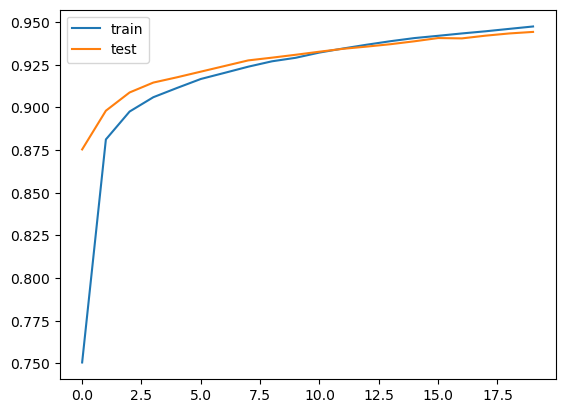

In [13]:
plt.plot(np.arange(20), history.history['accuracy'], label = 'train')
plt.plot(np.arange(20), history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

# Визуализация(способ №1.5)

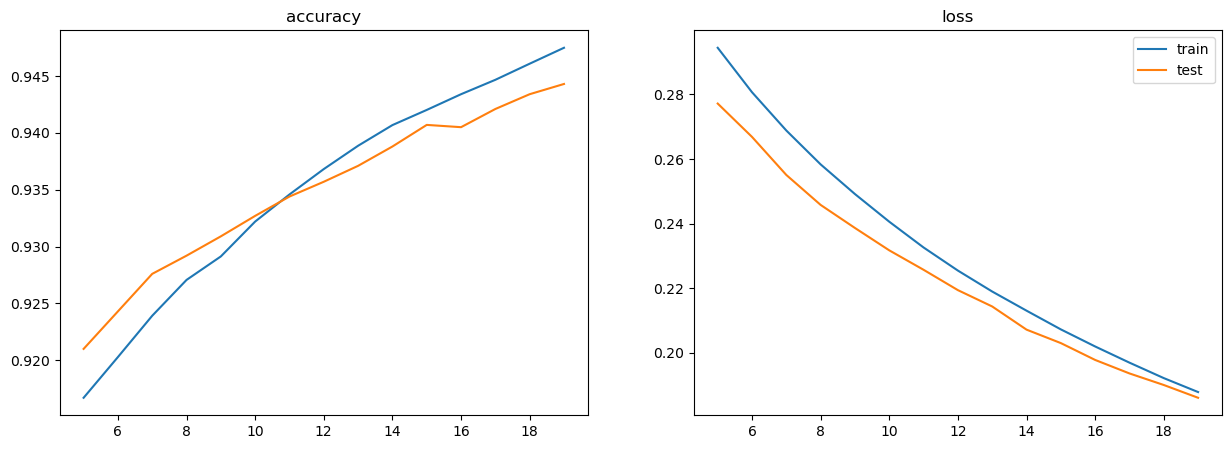

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].plot(np.arange(5, 20), history.history['accuracy'][5:], label = 'train')
axes[0].plot(np.arange(5, 20), history.history['val_accuracy'][5:], label = 'test')
axes[0].set_title('accuracy')

axes[1].plot(np.arange(5, 20), history.history['loss'][5:], label = 'train')
axes[1].plot(np.arange(5, 20), history.history['val_loss'][5:], label = 'test')
axes[1].set_title('loss')

plt.legend()
plt.show()

# Визуализация(способ №2)

In [15]:
!rm -rf ./logs/

In [16]:
classes = 10

model = k.Sequential()
model.add(Dense(42, activation='relu', input_shape = (784, ))) #входно-скрытый слой
model.add(Dense(classes, activation = 'softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = X_train, y = y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test),
                    callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs')])

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.9880 - accuracy: 0.7496 - val_loss: 0.4921 - val_accuracy: 0.8761
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4441 - accuracy: 0.8801 - val_loss: 0.3730 - val_accuracy: 0.8971
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3713 - accuracy: 0.8962 - val_loss: 0.3326 - val_accuracy: 0.9066
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3369 - accuracy: 0.9046 - val_loss: 0.3075 - val_accuracy: 0.9121
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3142 - accuracy: 0.9112 - val_loss: 0.2912 - val_accuracy: 0.9175
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2971 - accuracy: 0.9164 - val_loss: 0.2775 - val_accuracy: 0.9215
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2828 - accuracy: 0.9202 - val_loss: 0.2653 - val_accuracy: 0.9250
Epoch 

In [17]:
%load_ext tensorboard
%tensorboard --logdir logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-05-14 12:50:32.527981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 12:50:34.914646: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 12:50:34.966711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 12:50:34.967297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successfu

# А что еще умеет делать наша модель?

In [18]:
y_pred = model.predict(X_test)
np.round(y_pred[0], 3)

313/313 [==============================] - 0s 1ms/step


array([0.   , 0.   , 0.001, 0.004, 0.   , 0.   , 0.   , 0.995, 0.   ,
       0.001], dtype=float32)

In [19]:
y_pred[0].argmax()

7

In [20]:
#сохранять веса

model.save_weights('test_model')

In [21]:
#загружать веса

model.load_weights('test_model')

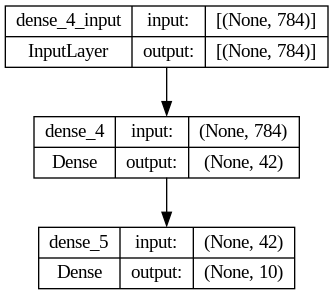

In [22]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [23]:
#дообучаться
model.fit(x = X_train, y = y_train, batch_size=64, epochs=1, validation_data=(X_test, y_test))

938/938 [==============================] - 3s 3ms/step - loss: 0.2423 - accuracy: 0.9317 - val_loss: 0.2335 - val_accuracy: 0.9329


# Изменяем архитектуру НС(для улучшения качества)

In [24]:
classes = 10

model = k.Sequential()
model.add(Dense(84, activation='relu', input_shape = (784, ))) #входно-скрытый слой
model.add(Dense(47, activation='relu'))
model.add(Dense(classes, activation = 'softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = X_train, y = y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.9597 - accuracy: 0.7564 - val_loss: 0.4217 - val_accuracy: 0.8861
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3806 - accuracy: 0.8927 - val_loss: 0.3247 - val_accuracy: 0.9058
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3171 - accuracy: 0.9088 - val_loss: 0.2887 - val_accuracy: 0.9193
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2820 - accuracy: 0.9177 - val_loss: 0.2580 - val_accuracy: 0.9264
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2567 - accuracy: 0.9261 - val_loss: 0.2400 - val_accuracy: 0.9310
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2360 - accuracy: 0.9322 - val_loss: 0.2244 - val_accuracy: 0.9354
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2181 - accuracy: 0.9375 - val_loss: 0.2094 - val_accuracy: 0.9397
Epoch 

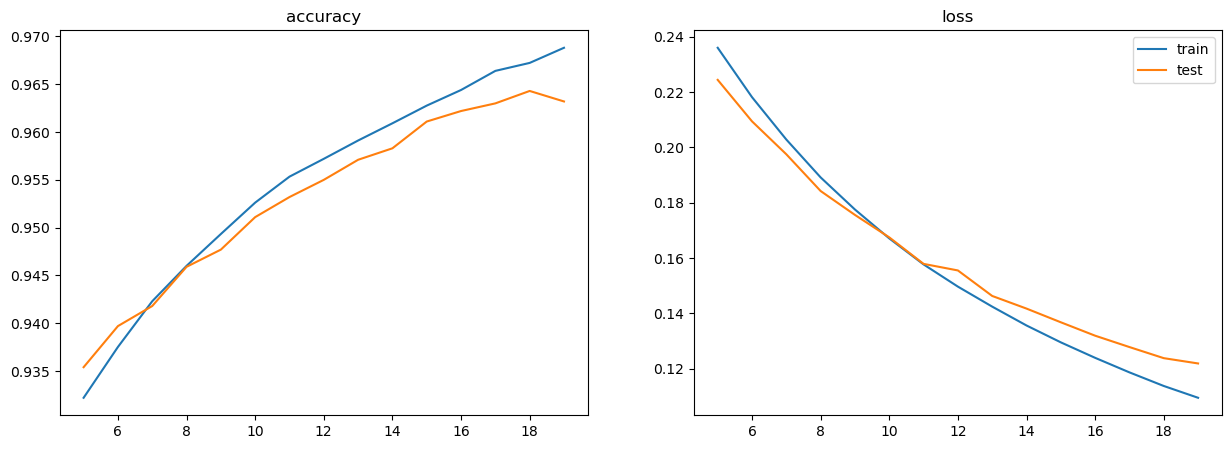

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].plot(np.arange(5, 20), history.history['accuracy'][5:], label = 'train')
axes[0].plot(np.arange(5, 20), history.history['val_accuracy'][5:], label = 'test')
axes[0].set_title('accuracy')

axes[1].plot(np.arange(5, 20), history.history['loss'][5:], label = 'train')
axes[1].plot(np.arange(5, 20), history.history['val_loss'][5:], label = 'test')
axes[1].set_title('loss')

plt.legend()
plt.show()

In [26]:
classes = 10

model = k.Sequential()
model.add(Dense(84, activation='relu', input_shape = (784, ))) #входно-скрытый слой
model.add(Dense(47, activation='relu'))
model.add(Dense(classes, activation = 'softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = X_train, y = y_train, batch_size=16, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.4646 - accuracy: 0.8724 - val_loss: 0.2634 - val_accuracy: 0.9263
Epoch 2/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2360 - accuracy: 0.9326 - val_loss: 0.1971 - val_accuracy: 0.9428
Epoch 3/20
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1839 - accuracy: 0.9475 - val_loss: 0.1628 - val_accuracy: 0.9520
Epoch 4/20
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1534 - accuracy: 0.9556 - val_loss: 0.1517 - val_accuracy: 0.9557
Epoch 5/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1316 - accuracy: 0.9617 - val_loss: 0.1276 - val_accuracy: 0.9614
Epoch 6/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1148 - accuracy: 0.9663 - val_loss: 0.1209 - val_accuracy: 0.9632
Epoch 7/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1020 - accuracy: 0.9700 - val_loss: 0.1112 - val_ac

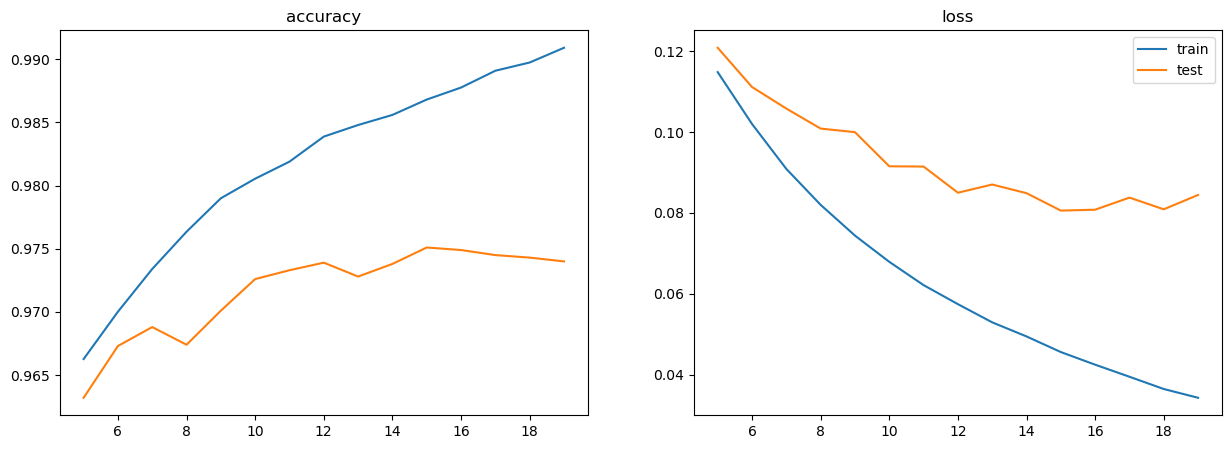

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].plot(np.arange(5, 20), history.history['accuracy'][5:], label = 'train')
axes[0].plot(np.arange(5, 20), history.history['val_accuracy'][5:], label = 'test')
axes[0].set_title('accuracy')

axes[1].plot(np.arange(5, 20), history.history['loss'][5:], label = 'train')
axes[1].plot(np.arange(5, 20), history.history['val_loss'][5:], label = 'test')
axes[1].set_title('loss')

plt.legend()
plt.show()

# Способы борьбы с переобучением

1. регуляризация
2. Dropout

In [28]:
#kernel_regularizer=regularizers.L1(0.01),
#activity_regularizer=regularizers.L2(0.01))

In [29]:
from keras.layers import Dropout

In [32]:
classes = 10

model = k.Sequential()
model.add(Dense(84, activation='relu', input_shape = (784, ))) #входно-скрытый слой
model.add(Dropout(0.2))
model.add(Dense(47, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(classes, activation = 'softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = X_train, y = y_train, batch_size=16, epochs=5, validation_data=(X_test, y_test), workers=-1)

Epoch 1/5
3750/3750 [==============================] - 17s 4ms/step - loss: 0.3852 - accuracy: 0.8853 - val_loss: 0.1450 - val_accuracy: 0.9573
Epoch 2/5
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2027 - accuracy: 0.9423 - val_loss: 0.1177 - val_accuracy: 0.9646
Epoch 3/5
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1650 - accuracy: 0.9517 - val_loss: 0.0995 - val_accuracy: 0.9692
Epoch 4/5
3750/3750 [==============================] - 17s 4ms/step - loss: 0.1444 - accuracy: 0.9576 - val_loss: 0.0937 - val_accuracy: 0.9736
Epoch 5/5
3750/3750 [==============================] - 17s 5ms/step - loss: 0.1306 - accuracy: 0.9614 - val_loss: 0.0968 - val_accuracy: 0.9705


# CNN

In [33]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [35]:
model = k.Sequential()
model.add(Conv2D(filters=17, kernel_size=(7, 7), padding='same', activation='relu'), input_shape=(28, 28, 1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=17, kernel_size=(7, 7), padding='same', activation='relu'), input_shape=(28, 28, 1))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

TypeError: Sequential.add() got an unexpected keyword argument 'input_shape'